# Generate Images from The Model

In [22]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# CONSTANTS

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Number of channels in the training images. For color images this is 3
nc = 3

In [4]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
device

device(type='cuda', index=0)

In [35]:
fixed_noise = torch.randn(1, nz, 1, 1, device=device)

## Generator Model Arch

In [8]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

## Load Trained Model

In [9]:
expID = 'exp001'

In [14]:
loaded_netG = Generator(ngpu).to(device)
loaded_netG.load_state_dict(torch.load(f'models/netG_{expID}.pt'))
loaded_netG.eval()
print(loaded_netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


## Generate Fake Images

In [53]:
from tqdm import tqdm

In [52]:
def load_trained_model(expID, ngpu=1, device=device):
    torch.cuda.empty_cache()
    loaded_netG = Generator(ngpu).to(device)
    loaded_netG.load_state_dict(torch.load(f'models/netG_{expID}.pt'))
    loaded_netG.eval()
    print('model is loaded!')
    return loaded_netG

In [54]:
def generate_fake_images(loaded_generator, folder_path, n_images=1000, nz=100, device=device):
    for i in tqdm(range(n_images)):
        noise = torch.randn(1, nz, 1, 1, device=device)
        fake = loaded_generator(noise).detach().cpu()
        fake_img = vutils.make_grid(fake, padding=2, normalize=True)
        transposed = np.transpose(vutils.make_grid(fake_img, padding=5, normalize=True).cpu(),(1,2,0))
        plt.imshow(transposed)
        plt.axis('off')
        plt.savefig(f'{folder_path}/image{i}.png')

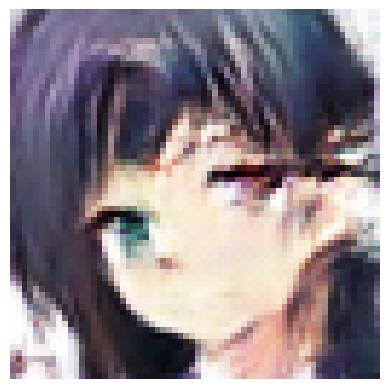

In [46]:
generate_fake_images(loaded_netG, 'fake_images/dcgan_exp001', n_images=2, nz=100, device=device)

## Loop Through All

In [47]:
from tqdm import tqdm

In [55]:
torch.cuda.empty_cache()

In [56]:
experiment_ids = ['exp001', 'exp002', 'exp003', 'exp004']

for exp in tqdm(experiment_ids):
    loaded_netG = load_trained_model(exp)
    generate_fake_images(loaded_netG, folder_path=f'fake_images/dcgan_{exp}', n_images=1000, nz=100, device=device)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

model is loaded!



  8%|██████▏                                                                         | 77/1000 [00:21<08:28,  1.82it/s]


 14%|███████████▎                                                                   | 143/1000 [01:14<13:37,  1.05it/s]


 21%|████████████████▌                                                              | 209/1000 [02:36<17:43,  1.34s/it]


 28%|█████████████████████▋                                                         | 275/1000 [04:26<21:11,  1.75s/it]


 34%|██████████████████████████▉                                                    | 341/1000 [06:42<25:05,  2.28s/it]


 41%|████████████████████████████████▏                                              | 407/1000 [09:26<26:23,  2.67s/it]


 47%|█████████████████████████████████████▎                                         | 473/1000 [12:36<27:06,  3.09s/it]


 54%|██████████████████████████████████████████▌                                    | 539/1000 [16:13<26:32,  3.45s/it]


 60%|███████████████████████████████████████████████▊                               | 605/1000 [20:23<27:21,  4.16s/it]


 67%|█████████████████████████████████████████████████████                          | 671/1000 [25:06<24:41,  4.50s/it]


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [30:20<21:06,  4.81s/it]


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [35:50<17:17,  5.27s/it]


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [41:50<12:15,  5.61s/it]


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [48:19<06:40,  6.17s/it]


 25%|████████████████████                                                            | 1/4 [55:16<2:45:48, 3316.16s/it]

model is loaded!



  6%|█████                                                                         | 65/1000 [07:31<1:49:52,  7.05s/it]


 13%|██████████                                                                   | 131/1000 [15:16<1:44:25,  7.21s/it]


 20%|███████████████▏                                                             | 197/1000 [23:33<1:44:57,  7.84s/it]


 26%|████████████████████▎                                                        | 263/1000 [32:34<1:42:29,  8.34s/it]


 33%|█████████████████████████▎                                                   | 329/1000 [42:00<1:36:43,  8.65s/it]


 40%|██████████████████████████████▍                                              | 395/1000 [51:49<1:31:17,  9.05s/it]


 46%|██████████████████████████████████▌                                        | 461/1000 [1:02:27<1:34:23, 10.51s/it]


 53%|███████████████████████████████████████▌                                   | 527/1000 [1:13:37<1:18:26,  9.95s/it]


 59%|████████████████████████████████████████████▍                              | 593/1000 [1:25:18<1:17:16, 11.39s/it]


 66%|█████████████████████████████████████████████████▍                         | 659/1000 [1:37:32<1:06:00, 11.61s/it]


 72%|███████████████████████████████████████████████████████▊                     | 725/1000 [1:49:53<53:15, 11.62s/it]


 79%|████████████████████████████████████████████████████████████▉                | 791/1000 [2:03:01<42:07, 12.09s/it]


 86%|█████████████████████████████████████████████████████████████████▉           | 857/1000 [2:16:31<30:43, 12.89s/it]


 92%|███████████████████████████████████████████████████████████████████████      | 923/1000 [2:30:17<16:11, 12.62s/it]


 99%|████████████████████████████████████████████████████████████████████████████▏| 989/1000 [2:44:29<02:24, 13.17s/it]


 50%|███████████████████████████████████████                                       | 2/4 [3:42:10<4:01:52, 7256.21s/it]

model is loaded!



 50%|███████████████████████████████████████                                       | 2/4 [3:42:22<3:42:22, 6671.17s/it]


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020F528D09D0> (for post_execute):


KeyboardInterrupt: 

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

model is loaded!



 30%|████████████████████████▎                                                        | 75/250 [00:22<01:32,  1.90it/s]


 56%|█████████████████████████████████████████████                                   | 141/250 [01:10<01:43,  1.05it/s]


 83%|██████████████████████████████████████████████████████████████████▏             | 207/250 [02:30<01:00,  1.41s/it]


 50%|█████████████████████████████████████████▌                                         | 1/2 [03:38<03:38, 218.06s/it]

model is loaded!



 26%|█████████████████████                                                            | 65/250 [02:13<06:47,  2.20s/it]


 52%|█████████████████████████████████████████▉                                      | 131/250 [04:53<05:02,  2.54s/it]


 79%|███████████████████████████████████████████████████████████████                 | 197/250 [07:59<02:39,  3.00s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [14:27<00:00, 433.81s/it]


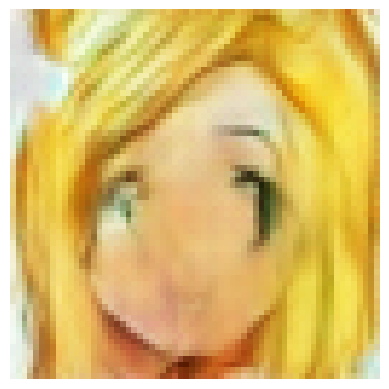

In [57]:
experiment_ids = ['exp003', 'exp004']

for exp in tqdm(experiment_ids):
    loaded_netG = load_trained_model(exp)
    generate_fake_images(loaded_netG, folder_path=f'fake_images/dcgan_{exp}', n_images=250, nz=100, device=device)

KeyboardInterrupt: 

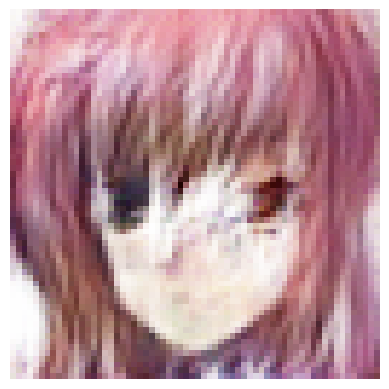

In [51]:
expID = 'exp001'
loaded_netG = load_trained_model(expID)
generate_fake_images(loaded_netG, folder_path=f'fake_images/dcgan_{expID}', n_images=1000, nz=100, device=device)

In [1]:
from pytorch_gan_metrics import (
    get_inception_score_from_directory,
    get_fid_from_directory,
    get_inception_score_and_fid_from_directory)

In [2]:
IS, IS_std = get_inception_score_from_directory(
    'data')

RuntimeError: stack expects each tensor to be equal size, but got [3, 63, 63] at entry 0 and [3, 62, 62] at entry 1

In [ ]:
FID = get_fid_from_directory(
    'path/to/images', 'path/to/statistics.npz')
(IS, IS_std), FID = get_inception_score_and_fid_from_directory(
    'path/to/images', 'path/to/statistics.npz')

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image to the desired height and width
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  # Normalize the image to [0, 1]
])

In [4]:
dataset = torchvision.datasets.ImageFolder(root='data', transform=transform)

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

In [6]:
from pytorch_gan_metrics import get_inception_score, get_fid

In [7]:
IS, IS_std = get_inception_score(dataloader)
IS, IS_std

AttributeError: 'list' object has no attribute 'to'